<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)
import pandas as pd
import numpy as np

#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
            

Load the dataset into a dataframe.


In [109]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

await download(dataset_url, "m2_survey_data.csv")
path="m2_survey_data.csv"

df = pd.read_csv(path, header=None)


<ipython-input-109-04074c3ce151>:6: DtypeWarning: Columns (0,29,31,32,39,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=None)


In [110]:
df.columns=df.iloc[0]
df = df.drop(df.index[0])
df.columns = list(map(str, df.columns))
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
2,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
3,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
5,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [7]:
# we are using the inline backend
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
# your code goes here
df['ConvertedComp'].dtype

dtype('float64')

<ipython-input-43-228ca5b19e6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False)


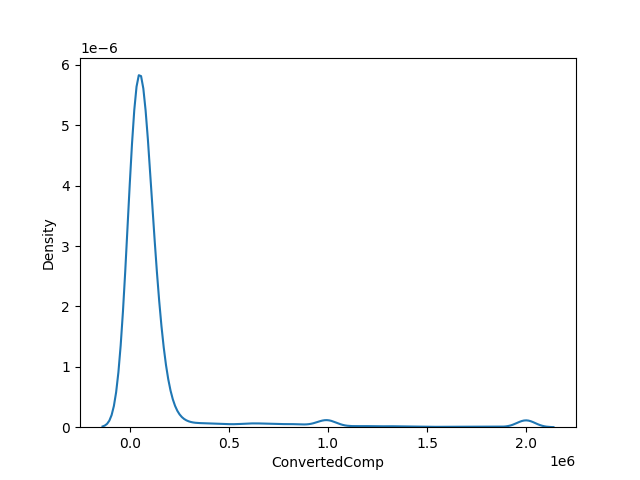

<Figure size 640x480 with 0 Axes>

In [43]:
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False)
plt.show()

Plot the histogram for the column `ConvertedComp`.


In [111]:
df['ConvertedComp'] = df['ConvertedComp'].astype(float)

<AxesSubplot:ylabel='Frequency'>

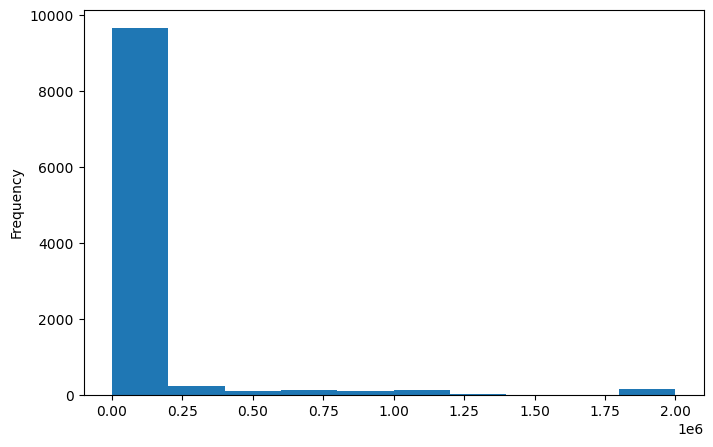

In [44]:
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

But this looks weird... so let's try to clean it up a little

In [53]:
# Convert the 'ConvertedComp' column to numeric and drop rows with missing values
df['ConvertedComp'] = pd.to_numeric(df['ConvertedComp'], errors='coerce')
df = df.dropna(subset=['ConvertedComp'])

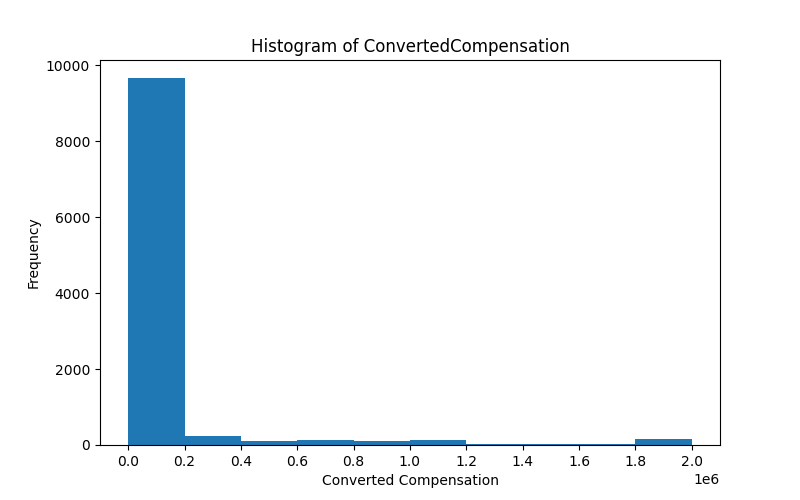

<Figure size 800x500 with 0 Axes>

In [54]:
count, bin_edges = np.histogram(df['ConvertedComp'].values)

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of ConvertedCompensation')
plt.ylabel('Frequency') # add y-label
plt.xlabel('Converted Compensation') # add x-label

plt.show()

What is the median of the column `ConvertedComp`?


In [112]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [62]:
# your code goes here
print ('\nThere are', df['Gender'].nunique(), 'unique Gender values in the survey:')

print('Gender                                                       Value Count')
print('-----------                                                --------------')
print(df['Gender'].value_counts())

print('\n', df['Gender'].eq('Man').sum(), 'respondents identify as "Man"')


There are 7 unique Gender values in the survey:
Gender                                                       Value Count
-----------                                                --------------
Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

 9725 respondents identify as "Man"


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [76]:
# your code goes here
df2 = df.loc[df['Gender'] == 'Woman', ['ConvertedComp']]
df2.median()

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [103]:
df['Age'].astype(float).median()

29.0

In [78]:
# your code goes here
df['Age'].astype(float).describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [80]:
# your code goes here
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

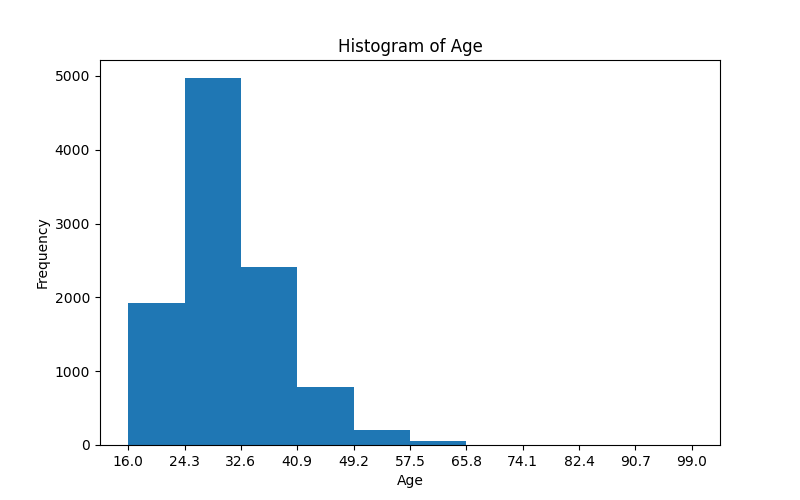

<Figure size 800x500 with 0 Axes>

In [81]:
count, bin_edges = np.histogram(df['Age'].values)

df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Age')
plt.ylabel('Frequency') # add y-label
plt.xlabel('Age') # add x-label

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


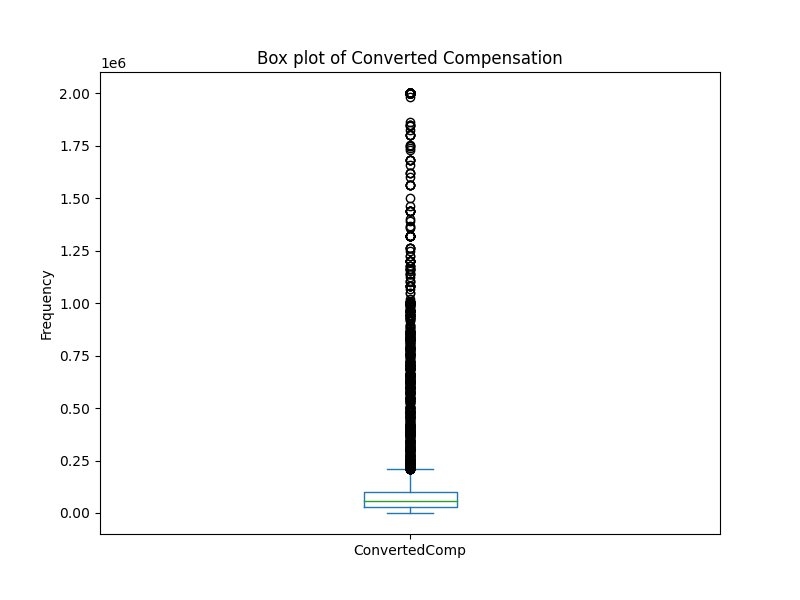

<Figure size 800x600 with 0 Axes>

In [84]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Converted Compensation')
plt.ylabel('Frequency')

plt.show()

<AxesSubplot:xlabel='ConvertedComp'>

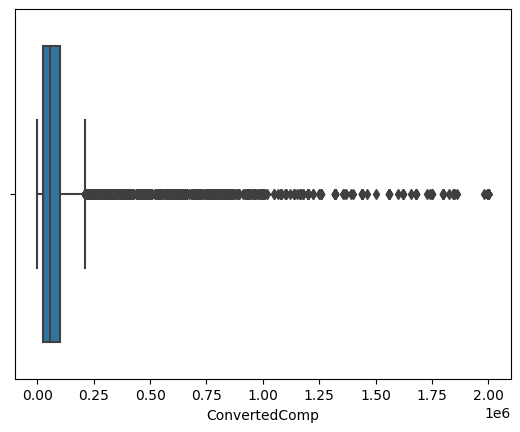

In [85]:
sns.boxplot(x=df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [86]:
# your code goes here
df["ConvertedComp"].astype(float).describe()

count    1.035400e+04
mean     1.313593e+05
std      2.939787e+05
min      0.000000e+00
25%      2.683450e+04
50%      5.760000e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [113]:
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print('The IQR is:', IQR)

The IQR is: 73132.0


Find out the upper and lower bounds.


In [114]:
# your code goes here
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print ('The lower bound is ', lower_bound, ' while the upper bound is ', upper_bound)

The lower bound is  -82830.0  while the upper bound is  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [115]:
# your code goes here
# It's an outlier if it is less than: Q1 - 1.5 * IQR. or if it is greater than: Q3 + 1.5 * IQR

print('Outliers below:\n', df['ConvertedComp'].lt(lower_bound).sum())
print('Outliers above:\n', df['ConvertedComp'].gt(upper_bound).sum())

Outliers below:
 0
Outliers above:
 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [116]:
# your code goes here
print(df.shape)
df3 = df[df['ConvertedComp'].le(upper_bound)]

(11398, 85)


In [117]:
print(df3.shape)

(9703, 85)


In [104]:
df3.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
2,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
3,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
5,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
6,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [118]:
df3['ConvertedComp'].median()

52704.0

In [119]:
df3['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [142]:
df['Age'] = df['Age'].astype(float)

In [143]:
df['Respondent'] = df['Respondent'].astype(float)

In [144]:
df['CompTotal'] = df['CompTotal'].astype(float)

In [145]:
df['WorkWeekHrs'] = df['WorkWeekHrs'].astype(float)

In [146]:
df['CodeRevHrs'] = df['CodeRevHrs'].astype(float)

In [ ]:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000

In [156]:
# your code goes here
corr_matrix = df3.corr()
print(corr_matrix['Age'])

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


In [157]:
# Compute correlation matrix
corr_ = df.corr()

# Print correlation of 'Age' with other columns
print(corr_['Age'])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
